# Participant Screening - Experiment 4: IT SynthTone

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from glob import glob

DATAFILE = '../data/response_data.csv'
OUTFILE = '../data/excluded.txt'

# Load data

In [2]:
all_data = pd.read_csv(DATAFILE)
data = all_data.copy()

# Headphone Test
Identify participants who got answered fewer than four headphone test trials correctly.

EXCLUDED: 20
[ 10  11  14  15  18  25  34  35  38  52  59  72  75  79  82 113 114 116
 121 123]


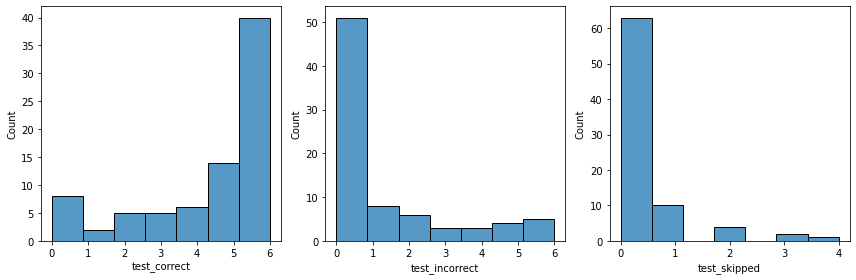

In [3]:
grouped = data.groupby('subject')
failed_test = grouped.test_correct.mean() < 4
failed_test = np.array(failed_test[failed_test].reset_index().subject)
print('EXCLUDED: %i' % len(failed_test))
print(failed_test)

# Audio test performance
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(grouped.test_correct.mean(), bins=7)
plt.subplot(132)
sns.histplot(grouped.test_incorrect.mean(), bins=7)
plt.subplot(133)
sns.histplot(grouped.test_skipped.mean(), bins=7)
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, failed_test)]

# Extreme Response Check
Identify participants who responded 0/50/100 at least 150 times.

EXCLUDED: 0
[]


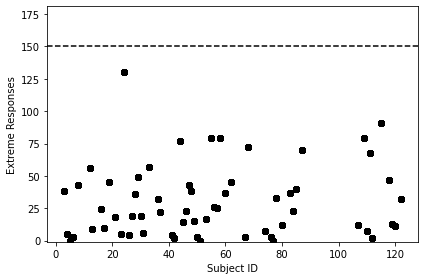

In [4]:
grouped = data.groupby('subject')
extreme_resp = grouped.extreme_responses.mean() >= 150
extreme_resp = np.array(extreme_resp[extreme_resp].reset_index().subject)
print('EXCLUDED: %i' % len(extreme_resp))
print(extreme_resp)

plt.scatter(data.subject, data.extreme_responses, c='k', label='Included')
plt.axhline(150, c='k', ls='--')
plt.ylim(-1, 181)
plt.ylabel('Extreme Responses')
plt.xlabel('Subject ID')
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, extreme_resp)]

# Outlier Response Check
Exclude participants whose responses were correlated r < .5 with the log of IOI.

EXCLUDED: 1
[5]


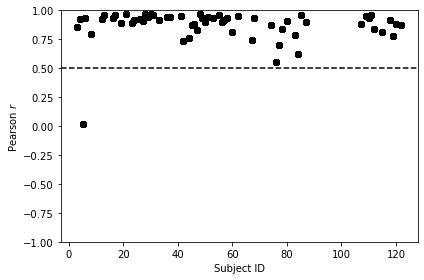

In [5]:
grouped = data.groupby('subject')
outlier = grouped.pearsonr.mean() < .5
outlier = np.array(outlier[outlier].reset_index().subject)
print('EXCLUDED: %i' % len(outlier))
print(outlier)

plt.scatter(data.subject, data.pearsonr, c='k')
plt.axhline(.5, c='k', ls='--')
plt.ylim(-1, 1)
plt.ylabel('Pearson $r$')
plt.xlabel('Subject ID')
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, outlier)]

# Save Exclusion

In [6]:
excluded = np.union1d(np.union1d(failed_test, extreme_resp), outlier)
included = data.subject.unique()
np.savetxt(OUTFILE, excluded, fmt='%i')

In [7]:
conditions = np.array([x[0] for x in all_data.groupby('subject').first_type.unique()])
incl_conditions = np.array([x[0] for x in data.groupby('subject').first_type.unique()])

print('EXCLUSION LIST:', excluded.tolist())
print('INCLUSION LIST:', included.tolist())
print('TOTALS:', len(excluded) + len(included), len(included))
print('CONDITIONS:', np.sum(conditions == 'p'), np.sum(conditions == 'a'), np.sum(incl_conditions == 'p'), np.sum(incl_conditions == 'a'))

EXCLUSION LIST: [5, 10, 11, 14, 15, 18, 25, 34, 35, 38, 52, 59, 72, 75, 79, 82, 113, 114, 116, 121, 123]
INCLUSION LIST: [3, 4, 6, 8, 12, 13, 16, 19, 21, 23, 24, 17, 27, 26, 28, 29, 30, 31, 33, 36, 37, 41, 45, 46, 47, 49, 48, 50, 51, 53, 57, 55, 58, 56, 60, 42, 44, 62, 67, 68, 74, 76, 77, 78, 80, 84, 83, 85, 87, 107, 109, 110, 111, 112, 115, 118, 119, 120, 122]
TOTALS: 80 59
CONDITIONS: 36 44 27 32
